## MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 1.5: Formas de onda básicas (caso analógico)

In [1]:
import math as m
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

### Motivação para o estudo das funções exponenciais complexas

Pode-se mostrar que qualquer função $x:[-T,T]\mapsto\mathbf{R}$ "razoável" (limitada e contínua por partes) pode ser escrita como

$$x(t) = \sum_{k=-\infty}^{\infty}c_ke^{i\omega_kt}$$

onde $\omega_k = k\pi/T$. Mas o que significa $e^{i\omega_kt}$?

### Relação de Euler

$$e^{i\theta} = \cos(\theta)+i\mbox{sen}(\theta)$$

Pensando em $\theta$ como uma função linear do tempo ($\theta=\omega t$) temos

$$e^{i\omega t} = \cos(\omega t)+i\mbox{sen}(\omega t)$$

que representa um *movimento circular uniforme* de velocidade angular $\omega$ rad/s.

### Como verificar a relação de Euler: o caminho de Taylor

Podemos representar várias funções $f(x)$ que nos interessam aqui,
como senos, cossenos e exponenciais,
através da série de Taylor $$f(x)=\sum_{n=0}^\infty a_nx^n.$$

Quando a representação de Taylor existe, podemos obter os coeficientes
$a_n$ calculando a função original e suas derivadas no ponto $x=0$:

$$\begin{array}{l}
f(0)=a_0\\
f'(x)=\sum_{n=1}^\infty na_nx^{n-1}\implies f'(0)=a_1\\
f''(x)=\sum_{n=2}^\infty n(n-1)a_nx^{n-2}\implies f''(0)=2a_2\implies a_2=\frac{f''(0)}{2}\\
\vdots\\
f^{(m)}(x)=\sum_{n=m}^\infty n(n-1)\cdots(n-m+1)a_nx^{n-m}\\
\quad\quad\implies
f^{(m)}(0)=m!a_m\implies a_m=\frac{f^{(m)}(0)}{m!}.\end{array}$$

### No caso das funções trigonométricas e exponenciais, temos...

$$\begin{array}{ll}
\mbox{sen}(x)&=\mbox{sen}(0)+\cos(0)x-\frac{\mbox{sen}(0)}{2}x^2-\frac{\cos(0)}{3!}x^3+\cdots\\
&=
\sum_{n=0}^\infty\frac{(-1)^nx^{2n+1}}{(2n+1)!}\\
\cos(x)&=\cos(0)-\mbox{sen}(0)x-\frac{\cos(0)}{2}x^2+\frac{\mbox{sen}(0)}{3!}x^3+\cdots\\
&=
\sum_{n=0}^\infty\frac{(-1)^nx^{2n}}{(2n)!}\\
e^x&=e^0+e^0x+\frac{e^0}{2}x^2+\frac{e^0}{3!}x^3+\cdots\\
&=\sum_{n=0}^\infty\frac{x^n}{n!}
\end{array}$$

### Para $x=i\omega t$, temos:

$$e^{i\omega t}=\sum_{n=0}^\infty\frac{(i\omega t)^n}{n!}
=\sum_{n=0}^\infty\frac{i^n(\omega t)^n}{n!}$$

Observe que para $n$ par temos $i^0,i^2,i^4,i^6,\ldots=1,-1,1,-1,\ldots$
e para $n$ ímpar temos $i^1,i^3,i^5,i^7,\ldots=i,-i,i,-i,\ldots$. Logo

$$e^{i\omega t}=\sum_{n=0}^\infty\frac{(-1)^n(\omega t)^{2n}}{(2n)!}+i\sum_{n=0}^\infty\frac{(-1)^n(\omega t)^{2n+1}}{(2n+1)!},$$

de onde obtemos a Relação de Euler $e^{i\omega t} = \cos(\omega t)+i\mbox{sen}(\omega t)$.

### Conversão entre senos, cossenos e exponenciais complexas

Considerando

$$e^{i\omega t} = \cos(\omega t)+i\mbox{sen}(\omega t)$$

$$e^{-i\omega t} = \cos(\omega t)-i\mbox{sen}(\omega t)$$

podemos concluir que

$$\cos(\omega t) = \frac{e^{i\omega t}+e^{-i\omega t}}{2} = \mbox{Re}(e^{i\omega t})$$

$$\mbox{sen}(\omega t) = \frac{e^{i\omega t}-e^{-i\omega t}}{2i} = \mbox{Im}(e^{i\omega t})$$

### Frequência angular e período

- $\omega$ (em rad/seg) corresponde ao ângulo em radianos percorrido no intervalo $t\in[0,1]$

- o período $\lambda$ é o menor valor positivo tal que

$$e^{i\omega(t+\lambda)}=e^{i\omega t}\quad \forall t\in\mathbb{R}$$

$${{\sin(\omega(t+\lambda)) = \sin(\omega t)}\atop{\cos(\omega(t+\lambda)) = \cos(\omega t)}}\quad\forall t,\ \lambda>0\ \min\implies \lambda|\omega|=2\pi \implies \lambda = \frac{2\pi}{|\omega|}$$

### Exemplo 1.10

Equivalência entre senos e cossenos e exponenciais complexas

Define duas funções equivalentes:

$$x_1(t) = \sin(t)+3\sin(-2t)-2\cos(-5t)$$

$$x_2(t) = \frac{e^{it}-e^{-it}}{2i}+
           \frac{-3e^{i2t}+3e^{-i2t}}{2i}-
           e^{i5t}+e^{-i5t}$$

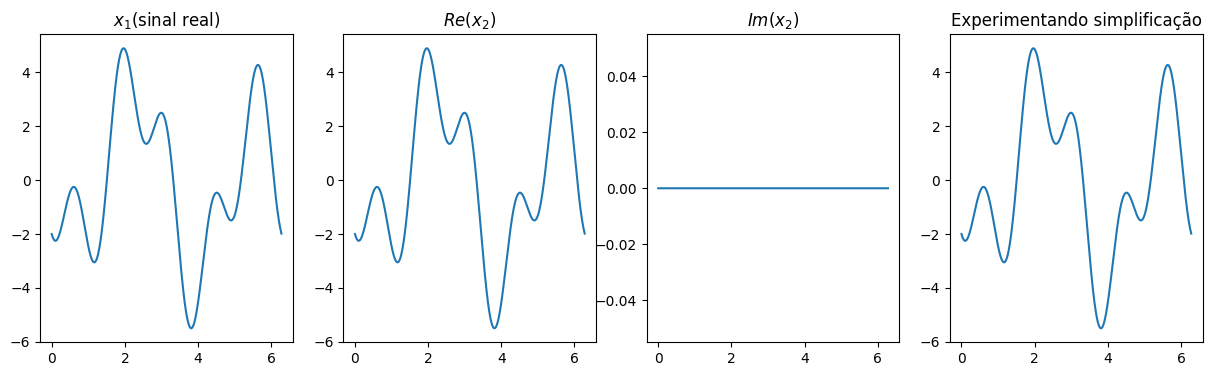

In [3]:
rate = 200; t = np.arange(0, 2 * m.pi, 1 / rate)
x1 = np.sin(t) + 3 * np.sin(-2 * t) - 2 * np.cos(-5 * t)
x2 = (m.e ** (1j * t) - m.e ** (-1j * t)) / (2 * 1j) + \
     (-3 * m.e ** (2 * 1j * t) + 3 * m.e ** (-2 * 1j * t)) / (2 * 1j) - \
     (m.e ** (5 * 1j * t) + m.e ** (-5 * 1j * t))
# testando simplificação 
experimento = np.sin(t) - 3 * np.sin(2*t) - 2 * np.cos(5*t)
x = [x1, x2.real, x2.imag, experimento]
f, ax = plt.subplots(1, 4, figsize=(15, 4))
for i in range(4):
    ax[i].plot(t,x[i])
    ax[i].set_title([r"$x_1$(sinal real)",r"$Re(x_2)$",r"$Im(x_2)$", "Experimentando simplificação"][i])
f.show()

### Figura 1.6: visualizações de uma exponencial complexa

Definem-se duas exponenciais complexas com frequências 0.25 Hz e 1 Hz:

$$f(t) = e^{i2\pi\frac{1}{4}t}$$

$$g(t) = e^{i2\pi t}$$

In [3]:
dur = 4
rate = 200
t = np.arange(0, dur, 1/rate)
f = [m.e ** (2 * m.pi * 0.25 * 1j * t), m.e ** (2 * m.pi * 1j * t)]

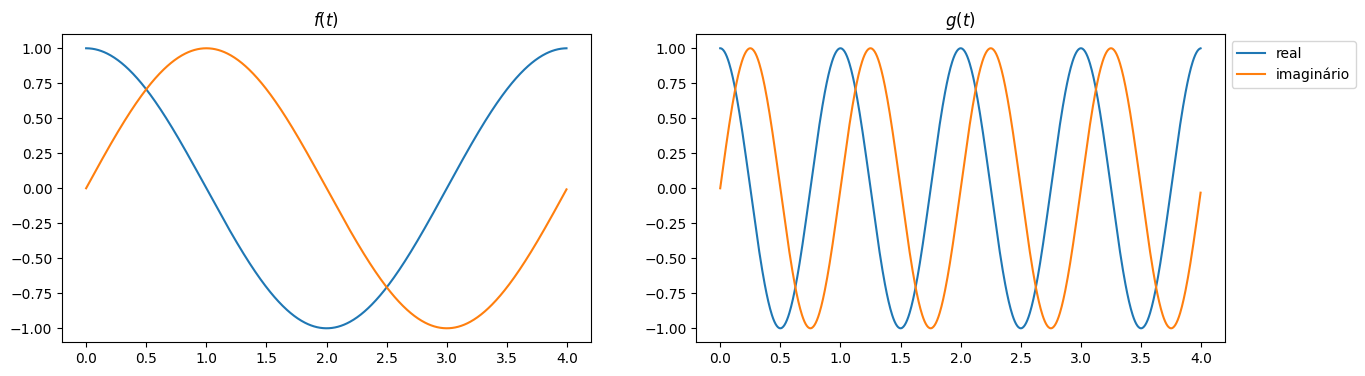

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
for i in range(2):
    ax[i].plot(t, f[i].real, label='real')
    ax[i].plot(t, f[i].imag, label='imaginário')
    ax[i].set_title([r"$f(t)$", r"$g(t)$"][i])
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.show()

__Alternativa:__ plota os mesmos gráficos como funções de $\mathbb{R}$ em $\mathbb{C}$

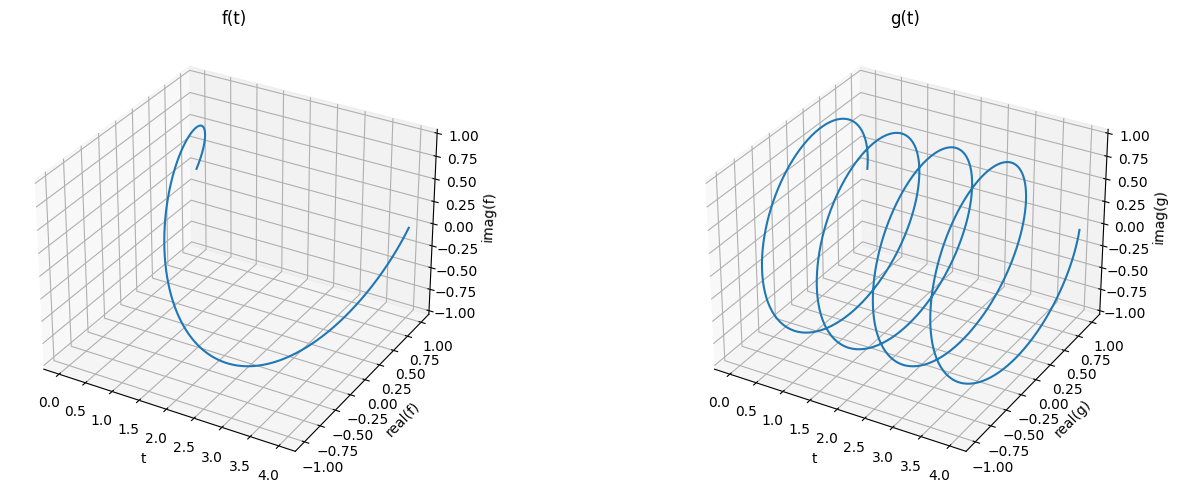

In [5]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
s = ax.plot3D(t,f[0].real,f[0].imag)
ax.set_title("f(t)"),ax.set_xlabel('t'),ax.set_ylabel('real(f)'),ax.set_zlabel('imag(f)')
ax = fig.add_subplot(1, 2, 2, projection='3d')
s2 = ax.plot3D(t,f[1].real,f[1].imag)
ax.set_title("g(t)"),ax.set_xlabel('t'),ax.set_ylabel('real(g)'),ax.set_zlabel('imag(g)')
fig.tight_layout()
fig.show()

__Alternativa:__ animação em $\mathbb{C}$ em função do tempo

In [34]:
%%capture
fig = plt.figure();

ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
ax.set_xlabel('real')
ax.set_ylabel('imag')
ax.set_aspect('equal');
linef, = ax.plot([], [], 'o-', lw=2)
lineg, = ax.plot([], [], 'o-', color='red', lw=2)
plt.legend(['$e^{i2\pi 0.5t}$', '$e^{i2\pi t}$'], loc='upper left', bbox_to_anchor=(1, 1))

# initialização: plota o fundo de cada quadro
def init():
    linef.set_data([], [])
    lineg.set_data([], [])
    return linef, lineg

# função de animação, chamada sequencialmente (i=índice do quadro)
def update(i):
    z = [ f[j][int(i*rate/fps)] for j in range(2) ]
    x = np.real(z)
    y = np.imag(z)
    linef.set_data([x[0],0], [y[0],0])
    lineg.set_data([x[1],0], [y[1],0])
    return linef, lineg

# call the animator.  blit=True means only re-draw the parts that have changed.
fps = 20
imf = anim.FuncAnimation(fig, update, init_func=init,
                              frames= dur*fps, interval=1000.0/fps, blit=True);

In [35]:
HTML(imf.to_jshtml())


### Novo exemplo: 3 componentes senoidais complexas e sua soma

$$e_1(t)=e^{i2\pi 0.2t}$$

$$e_2(t)=\frac{1}{2}e^{-i2\pi t}$$

$$e_3(t)=\frac{1}{4}e^{i2\pi 3.8t}$$

$$e_4(t)=\sum_{i=1}^3 e_i(t)$$


In [6]:
rate = 200
dur = 10
t = np.arange(0,dur,1/rate)
e = [m.e**(1j*2*np.pi*0.2*t),
     0.5*m.e**(1j*2*np.pi*(-1)*t),
     0.25*m.e**(1j*2*np.pi*3.8*t),
     m.e**(1j*2*np.pi*0.2*t)+0.5*m.e**(1j*2*np.pi*(-1)*t)+0.25*m.e**(1j*2*np.pi*3.8*t)]
l = ["$e_1(t)=e^{i2\pi 0.2t}$",
     "$e_2(t)=0.5e^{-i2\pi t}$",
     "$e_3(t)=0.25e^{i2\pi 3.8t}$",
     "$e_4(t)=\sum e_i(t)$"]

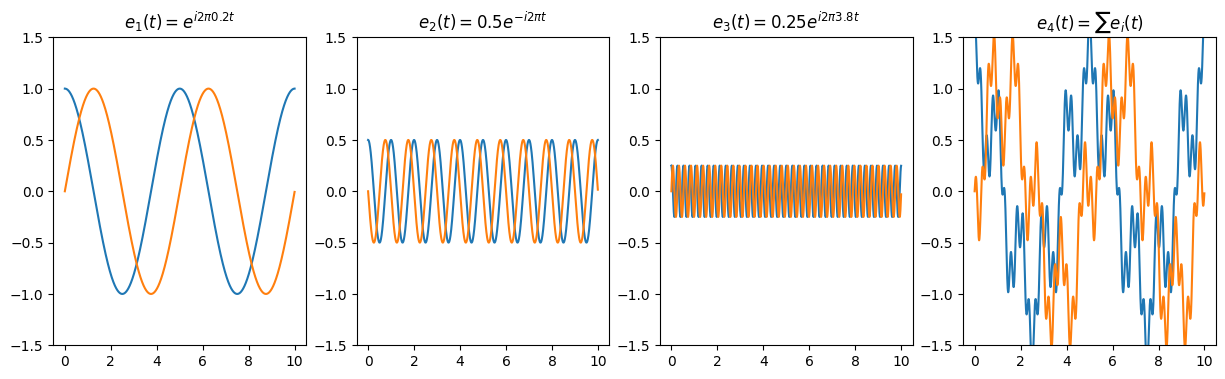

In [7]:
%matplotlib inline
f, ax = plt.subplots(1,4,figsize=(15,4))
for i in range(4):
    ax[i].plot(t,e[i].real,t,e[i].imag)
    ax[i].set_ylim([-1.5,1.5])
    ax[i].set_title(l[i])
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 4))
for i in range(4):
    ax = fig.add_subplot(1,4,i+1,projection='3d')
    s = ax.plot3D(t,e[i].real,e[i].imag)
    ax.set_title(l[i]),ax.set_xlabel('t'),ax.set_ylabel('$real(e_'+str(i+1)+')$'),ax.set_ylim3d([-1.5,1.5]),ax.set_zlabel('$imag(e_'+str(i+1)+')$'),ax.set_zlim3d([-1.5,1.5])
fig.tight_layout()
fig.show()

__Alternativa:__ animação em $\mathbb{C}$ em função do tempo

In [8]:
%%capture
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
line = [[]]*4
for j in range(4):
    line[j], = ax.plot([], [], 'o-', lw=2)
# initialização: plota o fundo de cada quadro
def init():
    for j in range(4):
        line[j].set_data([], [])
    return line
# função de animação, chamada sequencialmente (i=índice do quadro)
def animate(i):
    z = [ e[j][int(i*rate/fps)] for j in range(4) ]
    x = np.real(z)
    y = np.imag(z)
    for j in range(4):
        line[j].set_data([x[j],0], [y[j],0])
    return line
        
        
# call the animator.  blit=True means only re-draw the parts that have changed.
fps = 20
imf = anim.FuncAnimation(fig, animate, init_func=init,
                               frames=dur*fps, interval=1000.0/fps, blit=True)
plt.legend(['$e_1(t)$', '$e_2(t)$', '$e_3(t)$', '$e_4(t)$'], loc='upper left', bbox_to_anchor=(1, 1))
# se quiser salvar em arquivo:
#imf.save('anim_4exp.mp4', fps=20, extra_args=['-vcodec', 'libx264'])

In [9]:
HTML(imf.to_jshtml())

## Funções básicas exponenciais de duas variáveis

$$e^{i(\alpha x+\beta y)} = \cos(\alpha x+\beta y)+i\sin(\alpha x+\beta y)$$

Mas também vale que

$$e^{i(\alpha x+\beta y)} = e^{i\alpha x}e^{i\beta y}$$

Logo

$$\begin{array}{rl}
e^{i(\alpha x+\beta y)} = &\cos(\alpha x)\cos(\beta y)-\sin(\alpha x)\sin(\beta y)\\
&+i(\cos(\alpha x)\sin(\beta y)+\sin(\alpha x)\cos(\beta y))
\end{array}$$

(Observem como as identidades trigonométricas com somas de ângulos saem trivialmente!)

## Figura 1.7: Exemplos de exponenciais complexas em 2D

$$e^{i(\alpha x+\beta y)} = e^{i2\pi(px+qy)}$$

In [10]:
# Define todos os pares (p,q) ilustrados na figura 1.7
PQ = [(10, 0), (0, 10), (30, 8), (5, 10)]
# Define domínios espaciais (horizontal e vertical)
# usando as frequências p e q (em Hz)
density = 200
x = np.arange(0,1,1/density)
y = np.arange(1,0,-1/density)
x, y = np.meshgrid(x,y)

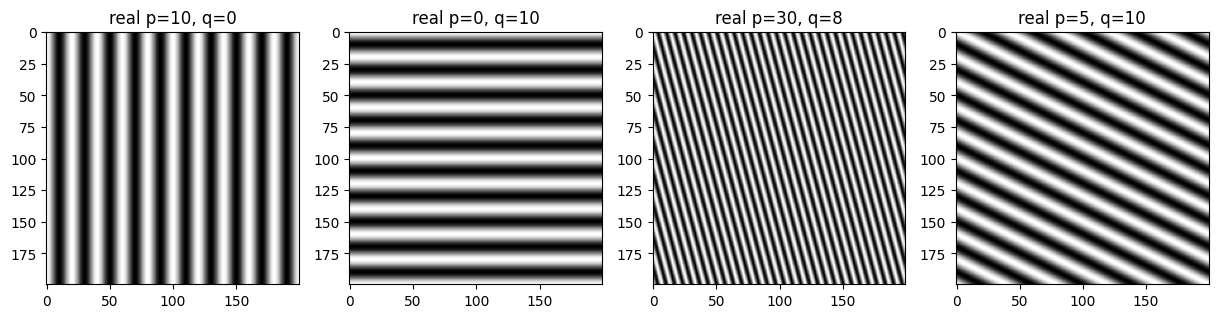

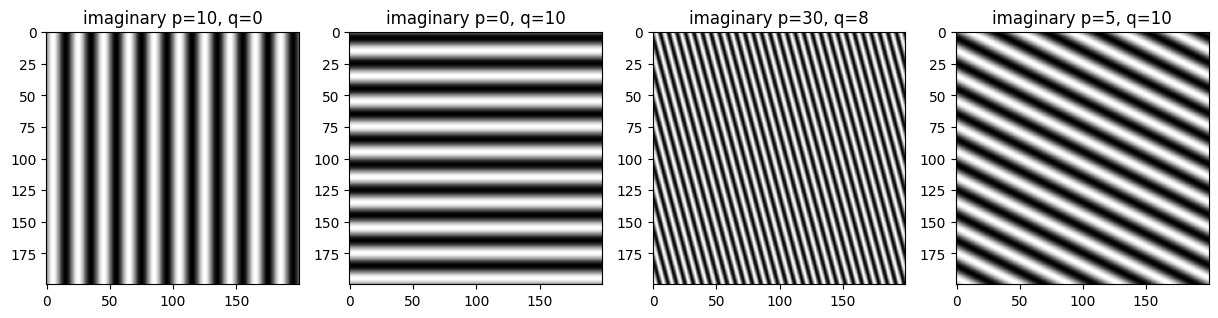

In [23]:
# Percorre os 4 cenários
%matplotlib inline
f, ax = plt.subplots(1,4,figsize=(15,4))
f, ax2 = plt.subplots(1,4,figsize=(15,4))

for j in range(4):
    p,q=PQ[j]
    # Define a exponencial complexa no plano xy
    f = m.e**(2*m.pi*1j*q*y)*m.e**(2*m.pi*1j*p*x)
    ax[j].imshow(0.5*(f.real+1), cmap='gray')
    ax[j].set_title("real p={0}, q={1}".format(p,q))
    ax2[j].imshow(0.5*(f.imag+1), cmap='gray')
    ax2[j].set_title("imaginary p={0}, q={1}".format(p,q))
    sumf = np.zeros(f.shape)
plt.show()

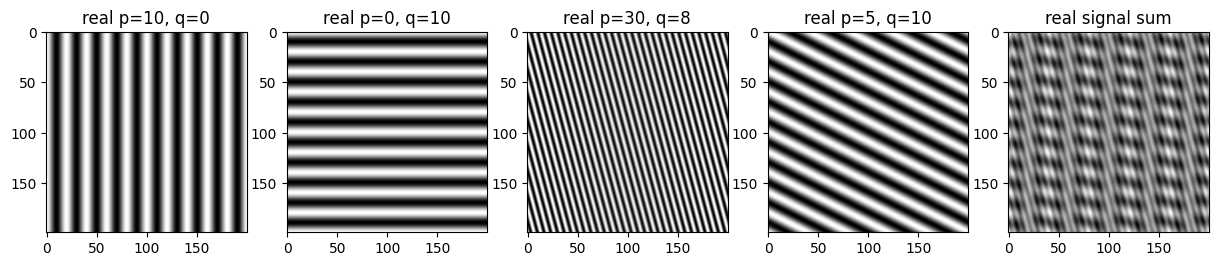

In [25]:
# Somando o sinal dos 4 cenários
%matplotlib inline
f, ax = plt.subplots(1,5,figsize=(15,4))

sumf = np.zeros((0,0))
for j in range(4):
    p,q=PQ[j]
    # Define a exponencial complexa no plano xy
    f = m.e**(2*m.pi*1j*q*y)*m.e**(2*m.pi*1j*p*x)
    ax[j].imshow(0.5*(f.real+1), cmap='gray')
    ax[j].set_title("real p={0}, q={1}".format(p,q))
    sumf = np.zeros(f.shape, dtype='complex')

for j in range(4):
    p,q=PQ[j]
    # Define a exponencial complexa no plano xy
    sumf += m.e**(2*m.pi*1j*q*y)*m.e**(2*m.pi*1j*p*x)

ax[4].imshow(0.5*(sumf.real+1), cmap='gray')
ax[4].set_title("real signal sum".format(p,q))


    
plt.show()

